In [ ]:
import pandas as pd
import json 
import numpy

co2Arr = []
tempArr = []
dateTimeArr = []
nameArr = ['c2cha4','tcha4','hych4','10cha4','n2cha4','nocha4','dateheure']
dispArr = ['CO2','temp','humidity','PM10','NO2','NO','dateTime']
bigDataArr = []

with open('qualite-de-lair-mesuree-dans-la-station-chatelet.json') as json_data:
    jsonData = json.load(json_data)
    
    for i in jsonData:        
        
        fields = i['fields']        
        tempArr = []
        
        for j in range(len(nameArr)-1):            
            ent = numpy.nan
            if nameArr[j] in fields:
                ent = fields[nameArr[j]]
            tempArr.append(ent)
            
        j = len(nameArr)-1 # special processing for dateTime
        ent = numpy.nan
        if nameArr[j] in fields:
                ent = fields[nameArr[j]]
                ent = ent[0:19]
                ent = ent.replace("T"," ")
                #print(ent)
        tempArr.append(ent)
            
        bigDataArr.append(tempArr)
        
# transpose
bigDataArr = [[bigDataArr[j][i] for j in range(len(bigDataArr))] for i in range(len(bigDataArr[0]))] 
        
# c2cha4 = CO2
# tcha4 = TEMP
# hych4 = humidity
# 10cha4 = PM10
# n2cha4 = NO2
# nocha4 = NO
# dateheure = dateTime

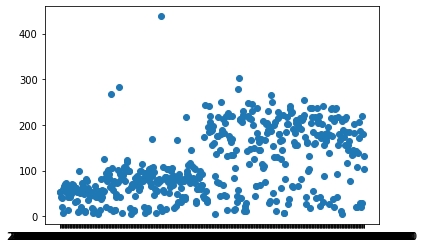

2019-09-08 19:00:00


In [3]:
# quick diagnostics
import matplotlib.pyplot as plt

#print(dateTimeArr[1:10])
fig = plt.scatter(bigDataArr[6][0:500],bigDataArr[3][0:500])
plt.show()
test = max(bigDataArr[6])
print(test)

In [4]:
# turn into dataframe for PROPHET
import pandas as pd
d = {'ds': bigDataArr[6],'y': bigDataArr[3]}
chateletPm10 = pd.DataFrame(data=d)

In [5]:
# start playing around with PROPHET
from fbprophet import Prophet

df = chateletPm10
df.head()

#df = df.loc[0:200,:]

df.head()

,ds,y
0,2018-12-31 18:00:00,54.0
1,2018-12-31 20:00:00,52.0
2,2019-01-01 08:00:00,41.0
3,2019-01-01 18:00:00,40.0
4,2019-01-01 20:00:00,20.0


In [6]:
# fitting
m = Prophet()
m.fit(df) # Fitting should take 1-5 seconds

In [8]:
# predict
future = m.make_future_dataframe(periods=20)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
58566,2019-09-24 19:00:00,74.396669,-25.190644,177.441904
58567,2019-09-25 19:00:00,79.670278,-17.733210,177.089648
58568,2019-09-26 19:00:00,72.705683,-23.712021,169.823787
58569,2019-09-27 19:00:00,50.300645,-49.678572,147.002176
58570,2019-09-28 19:00:00,8.058426,-91.840634,108.720946


In [ ]:
plt.scatter(df.ds,df.y)

In [ ]:
plt.plot(forecast.ds,forecast.yhat)

In [13]:
import pickle
pkl_path = "chateletPm10_prophet.pkl"
with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(m, f)

# save the dataframe
forecast.to_pickle("chateletPm10_forecast.pkl")
print("*** Data Saved ***")

*** Data Saved ***
